# CONV2019 Model

In [21]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import torch
from torch.utils import data
import torchxrayvision as xrv
import math
import cv2
import uuid
import os
from git import Repo
import importlib.util

## Util Functions

In [22]:
def show_images(images, ncols = 1):    
    nrows =  math.ceil(len(images) / ncols)
    fig=plt.figure(figsize=(10,5))
    for ind,img in enumerate(images):        
        ax = fig.add_subplot(nrows, ncols, ind+1)
        ax.imshow(img)
        ax.grid('on', linestyle='--')
        ax.axis('off')
        #ax.set_title("{},{}".format(img.shape[0],img.shape[1]))
        ax.set_aspect('equal')        
    plt.tight_layout()    
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()  

## Load dataset

In [24]:
torchxrayvision_folder = importlib.util.find_spec("torchxrayvision").submodule_search_locations[0]
repo_uri = "https://github.com/ieee8023/covid-chestxray-dataset.git"
repo_name = os.path.splitext(os.path.basename(repo_uri))[0]
repot_folder = os.path.join(torchxrayvision_folder, repo_name)
if not os.path.isdir(repot_folder):
    Repo.clone_from(repo_uri, repot_folder)
ds_covid19 = xrv.datasets.COVID19_Dataset() #use loader 

# Visualization

In [26]:
# filter out covid19 images
covid19_images_list = [ ds_covid19[i]["PA"][0] for i in range(len(ds_covid19)) if dict(zip(ds_covid19.pathologies, ds_covid19[i]["lab"]))["COVID-19"] == 1.0]
# filter out normal images
normal_images_list = [ds_covid19[i]["PA"][0] for i in range(len(ds_covid19)) if dict(zip(ds_covid19.pathologies, ds_covid19[i]["lab"]))["COVID-19"] == 0.0]
# convert images to np.uint8
covid19_images_list = [cv2.normalize(img,None,0,255,cv2.NORM_MINMAX,cv2.CV_8U) for img in covid19_images_list]
normal_images_list = [cv2.normalize(img,None,0,255,cv2.NORM_MINMAX,cv2.CV_8U) for img in normal_images_list]

### 1. Infected Patients

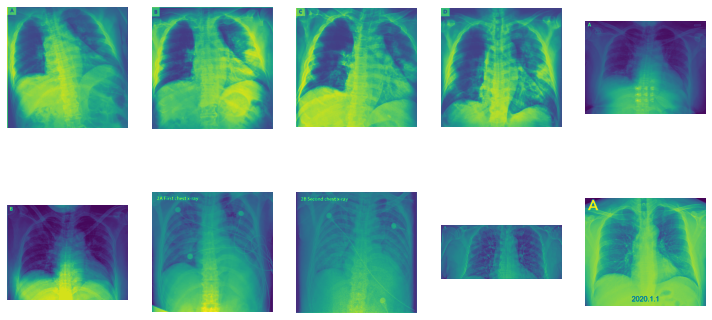

In [27]:
show_images(covid19_images_list[:10], ncols=5)

#### 2. Not Infected Patients

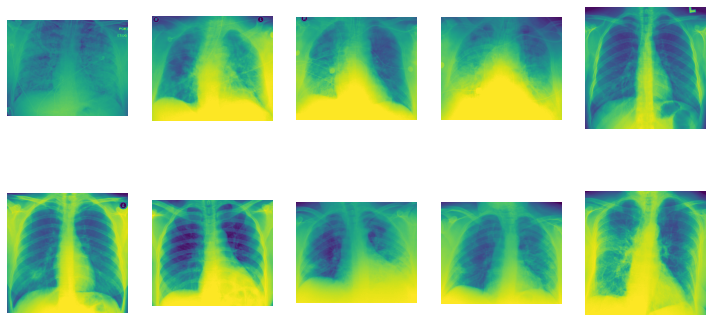

In [28]:
show_images(normal_images_list[:10], ncols=5)
